In [328]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import salem

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [327]:
cd ..

/home/ck/pythonWorkspace


In [181]:
Flsta = '/media/ck/Elements/Africa/WestAfrica/NFLICS/LSTA_2004-2015/netcdf_onCores/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200508181700.nc'

In [393]:
Fmsg = '/media/ck/Elements/Africa/WestAfrica/cores_bigDomain/coresPower_MSG_-40_9-130km_-50points_dominant_2007_09.nc'

In [394]:
img = xr.open_dataset(Fmsg).isel(time=0).load()

In [395]:
from scipy import ndimage
from scipy.ndimage.measurements import label
tirs = img['tir'].copy()
# tirs.values[tirs.values<-5] = 0
# tirs.values[tirs.values>20000]=0

In [396]:
labels, numL = label(tirs)

u, inv = np.unique(labels, return_inverse=True)
n = np.bincount(inv)

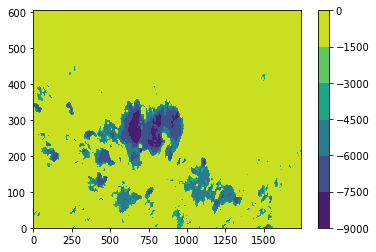

In [398]:
plt.contourf(img['tir'])
plt.colorbar()

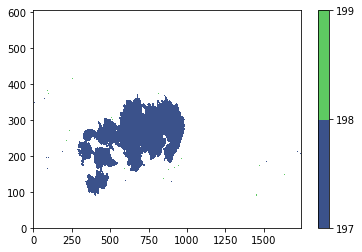

In [411]:
plt.contourf(labels, levels=np.arange(197,200))
plt.colorbar()

In [414]:
n[197:200]

array([  167, 81935,     5])

In [330]:
FcorrectMSG = '/media/ck/Elements/Africa/WestAfrica/cores_testdomain/coresPower_MSG_-40_9-130km_-50points_dominant_2020_06.nc'

In [184]:
lsta = xr.open_dataset(Flsta)
msg = xr.open_dataset(Fmsg)
cmsg = xr.open_dataset(FcorrectMSG)

In [185]:
ecmsg = cmsg.isel(time=4)#.sel(lon=cmsg.lon[0:230], lat=cmsg.lat[290:480])
emsg = msg.isel(time=4)#.sel(lon=msg.lon[0:230], lat=msg.lat[290:480])

In [186]:
cmsg.lat.values[1::]-cmsg.lat.values[0:-1]

array([0.02706366, 0.02706275, 0.02706183, 0.0270609 , 0.02705997,
       0.02705904, 0.0270581 , 0.02705715, 0.02705619, 0.02705523,
       0.02705427, 0.02705329, 0.02705231, 0.02705133, 0.02705034,
       0.02704934, 0.02704834, 0.02704733, 0.02704631, 0.02704529,
       0.02704426, 0.02704323, 0.02704219, 0.02704115, 0.02704009,
       0.02703904, 0.02703797, 0.0270369 , 0.02703583, 0.02703475,
       0.02703366, 0.02703256, 0.02703146, 0.02703036, 0.02702925,
       0.02702813, 0.027027  , 0.02702587, 0.02702474, 0.02702359,
       0.02702245, 0.02702129, 0.02702013, 0.02701896, 0.02701779,
       0.02701661, 0.02701543, 0.02701424, 0.02701304, 0.02701184,
       0.02701063, 0.02700941, 0.02700819, 0.02700697, 0.02700573,
       0.02700449, 0.02700325, 0.027002  , 0.02700074, 0.02699948,
       0.02699821, 0.02699693, 0.02699565, 0.02699437, 0.02699307,
       0.02699177, 0.02699047, 0.02698916, 0.02698784, 0.02698652,
       0.02698519, 0.02698385, 0.02698251, 0.02698117, 0.02697

In [187]:
import salem
from utils import u_grid

grid = cmsg.salem.grid

In [188]:
cmsg.lat

<xarray.DataArray 'lat' (lat: 605)>
array([ 4.      ,  4.027064,  4.054126, ..., 19.917082, 19.942569, 19.968051])
Coordinates:
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 19.89 19.92 19.94 19.97

In [189]:
lat

array([[ 4.        ,  4.        ,  4.        , ...,  4.        ,
         4.        ,  4.        ],
       [ 4.02706366,  4.02706366,  4.02706366, ...,  4.02706366,
         4.02706366,  4.02706366],
       [ 4.05412732,  4.05412732,  4.05412732, ...,  4.05412732,
         4.05412732,  4.05412732],
       ...,
       [20.29232259, 20.29232259, 20.29232259, ..., 20.29232259,
        20.29232259, 20.29232259],
       [20.31938625, 20.31938625, 20.31938625, ..., 20.31938625,
        20.31938625, 20.31938625],
       [20.3464499 , 20.3464499 , 20.3464499 , ..., 20.3464499 ,
        20.3464499 , 20.3464499 ]])

In [190]:
ogrid = u_grid.make(np.arange(cmsg.lon.min(),cmsg.lon.max()), np.arange(cmsg.lat.min(),cmsg.lat.max()), 3000)

In [191]:
oogrid = ogrid.to_dataset()

In [217]:
nogrid = cmsg.salem.grid

In [218]:
nolon, nolat = nogrid.ll_coordinates

In [208]:
cmsg.lon.max()-cmsg.lon.min()/0.02694946

<xarray.DataArray 'lon' ()>
array(696.88981437)

In [210]:
tgrid = u_grid.make(np.arange(cmsg.lon.min(),cmsg.lon.max()), np.arange(cmsg.lat.min(),cmsg.lat.max()), 0.02694946, keep_ll=True)

In [211]:
tlon, tlat = tgrid.ll_coordinates

In [219]:
nolon[0,0:-295]

array([-18.        , -17.97305054, -17.94610108, ...,  20.96891703,
        20.99586648,  21.02281594])

In [216]:
lsta.lon

<xarray.DataArray 'lon' (lon: 1410)>
array([-18.      , -17.973051, -17.946101, ...,  19.917888,  19.944838,
        19.971787])
Coordinates:
  * lon      (lon) float64 -18.0 -17.97 -17.95 -17.92 ... 19.92 19.94 19.97

In [149]:
lon, lat = grid.ll_coordinates

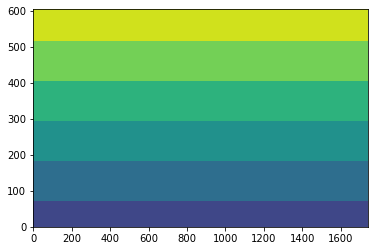

In [157]:
plt.contourf(lat, levels=np.arange(0,24,3))

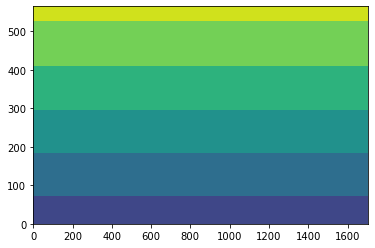

In [158]:
plt.contourf(olat, levels=np.arange(0,24,3))

In [159]:
lat

array([[ 4.        ,  4.        ,  4.        , ...,  4.        ,
         4.        ,  4.        ],
       [ 4.02706366,  4.02706366,  4.02706366, ...,  4.02706366,
         4.02706366,  4.02706366],
       [ 4.05412732,  4.05412732,  4.05412732, ...,  4.05412732,
         4.05412732,  4.05412732],
       ...,
       [20.29232259, 20.29232259, 20.29232259, ..., 20.29232259,
        20.29232259, 20.29232259],
       [20.31938625, 20.31938625, 20.31938625, ..., 20.31938625,
        20.31938625, 20.31938625],
       [20.3464499 , 20.3464499 , 20.3464499 , ..., 20.3464499 ,
        20.3464499 , 20.3464499 ]])

In [160]:
olat

array([[ 4.        ,  4.        ,  4.        , ...,  4.        ,
         4.        ,  4.        ],
       [ 4.02706366,  4.02706366,  4.02706366, ...,  4.02706366,
         4.02706366,  4.02706366],
       [ 4.05412641,  4.05412641,  4.05412641, ...,  4.05412641,
         4.05412641,  4.05412641],
       ...,
       [18.91991481, 18.91991481, 18.91991481, ..., 18.91991481,
        18.91991481, 18.91991481],
       [18.94556002, 18.94556002, 18.94556002, ..., 18.94556002,
        18.94556002, 18.94556002],
       [18.97120125, 18.97120125, 18.97120125, ..., 18.97120125,
        18.97120125, 18.97120125]])

In [165]:
len(lon)

605

In [164]:
len(olon)

566

In [119]:
lsta = lsta.sel(lon=lsta.lon[0:230], lat=lsta.lat[290:480])

In [120]:
lsta

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

<xarray.Dataset>
Dimensions:  (lat: 0, lon: 230, scales: 11)
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 -18.0 -17.97 -17.95 -17.92 ... -11.88 -11.86 -11.83
  * scales   (scales) float64 20.0 26.39 34.82 45.95 ... 139.3 183.8 242.5 320.0
Data variables:
    lsta     (lat, lon) int16 
    NbSlot   (lat, lon) int8 
    wavelet  (scales, lat, lon) int16 ...

In [121]:
def draw_map(t, lat, lon, levels=None):
    f=plt.figure(figsize=(15,10))
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), levels=levels)
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.colorbar()
    plt.show()

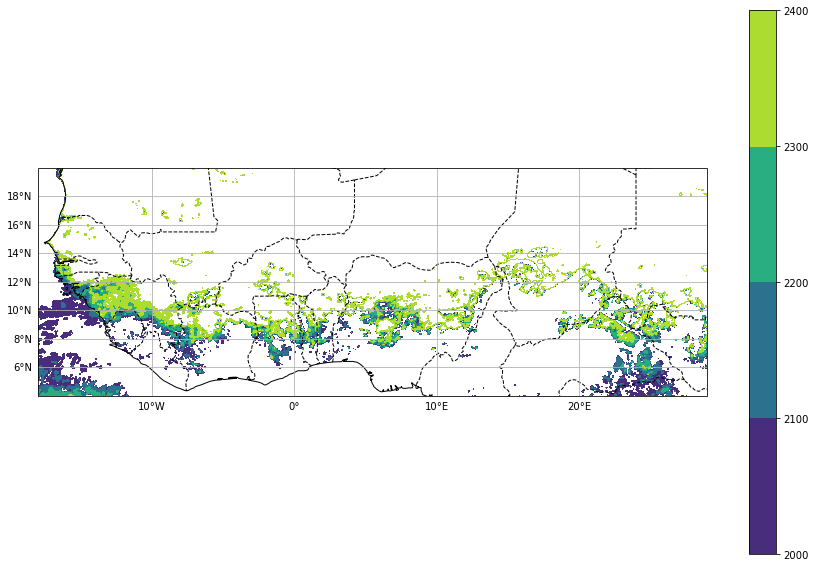

In [122]:
draw_map(ecmsg['tir'], ecmsg.lat, ecmsg.lon, levels=np.arange(2000,2500,100))

In [227]:
draw_map(lsta['lsta'], lsta.lat, lsta.lon, levels=np.arange(-50,50,10))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [272]:
dummy = xr.open_dataset('/media/ck/Elements/Africa/WestAfrica/cores_bigDomain/coresPower_MSG_-40_9-130km_-50points_dominant_2019_08.nc')
grid = dummy.salem.grid

f = '/media/ck/Elements/Africa/WestAfrica/NFLICS/LSTA_2004-2015/netcdf/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200406051700.nc'
dat = xr.open_dataset(f)
inds, weights, shape = u_int.interpolation_weights_grid(dat['lon'].values, dat['lat'].values, grid)

f = '/media/ck/Elements/Africa/WestAfrica/NFLICS/LSTA_2004-2015/netcdf_onCores/HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200406051700.nc'
datwav = xr.open_dataset(f)

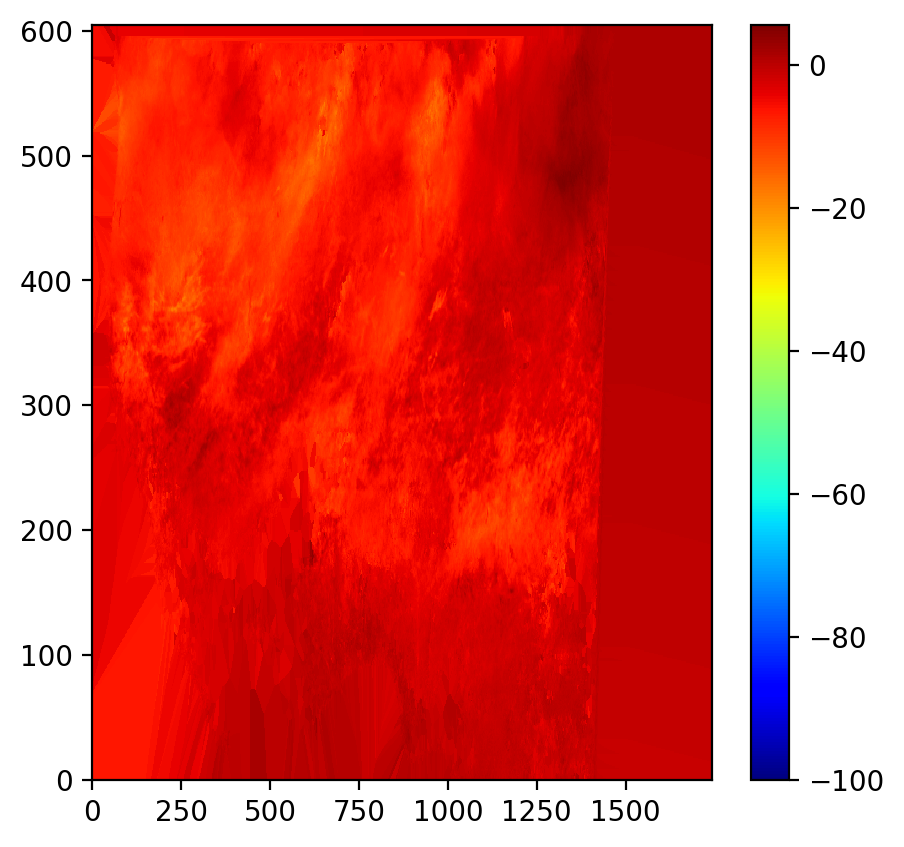

In [324]:
from wavelet import util
from scipy.interpolate import griddata

savefile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/test_lstawavelet.nc'

ds = xr.Dataset()


try:
    lsta = u_int.interpolate_data(dat['lsta'].values, inds, weights, shape)
except IndexError:
    print('Interpolation problem, continue')
lon, lat = grid.ll_coordinates

nbslot = u_int.interpolate_data(dat['NbSlot'].values, inds, weights, shape)



lsw = lsta.copy()
lsta[np.isnan(lsta)] = -99

grad = np.gradient(lsta)
nok = np.where(abs(grad[0])+abs(grad[1]) > 50)
nbslot[nok] = -99

d = 5
i = nok[0]
j = nok[1]
# edge smoothing for wavelet application
for ii, jj in zip(i, j):
    kern = nbslot[ii - d:ii + d + 1, jj - d:jj + d + 1]
    nbslot[ii - d:ii + d + 1, jj - d:jj + d + 1] = -99

inter1 = np.where(np.isnan(lsw))
points = np.where(np.isfinite(lsw))
#interpolate over sea from land points
#wav_input[inter1] = 0  #halfway between minus and plus rather than interpolate

try:
     lsw[inter1] = griddata(points, np.ravel(lsw[points]), inter1, method='nearest')  #linear
except ValueError:
    print('Value Error')
    pass

lsw[np.isnan(lsw)]=-99



# inter = np.where(np.isnan(lsta))
# try:
#      lsta[inter] = griddata(points, np.ravel(lsta[points]), inter, method='nearest')
# except ValueError:
#     print('Value Error!')
#     lsta[inter]=0

# lsw[np.isnan(lsw)]=0

f = plt.figure(figsize=(5,5), dpi=200)
plt.pcolormesh(lsw, cmap='jet', vmin=-100)
plt.colorbar()


dlsta = xr.DataArray((np.round(lsta, 2)*100).astype(np.int16), coords={
    'lat': lat[:, 0],
    'lon': lon[0, :]}, dims=['lat', 'lon'])

dslot = xr.DataArray(np.round(nbslot,0).astype(np.int8), coords={
    'lat': lat[:, 0],
    'lon': lon[0, :]}, dims=['lat', 'lon'])

ds['lsta'] = dlsta
ds['NbSlot'] = dslot


#lsw[lsw > 1000] = 0
dic = util.applyHat_pure(lsw, dataset='NOWCAST')

wav = xr.DataArray(np.array(np.round(dic['coeffs'], 1) * 10).astype(np.int16),
                  coords={'scales': dic['scales'], 'lat': lat[:,0],
                                     'lon': lon[0,:]},
                  dims=['scales', 'lat', 'lon'])
ds['wavelet'] = wav

# for sliced in ds['wavelet'].values:
#     sliced[np.isnan(lsta)] = np.nan
pos = np.where(lsta==-99)
pos = np.where(lsta==-99)
ds['wavelet'].values[:, pos[0], pos[1]] = 0
ds['wavelet'].values[:, inter1[0], inter1[1]] = 0

ds = ds.isel(lon=slice(0,1410), lat=slice(0,594))
comp = dict(zlib=True, complevel=5)
enc = {var: comp for var in ds.data_vars}
#savefile = f.replace('netcdf', 'netcdf_onCores')
ds.to_netcdf(path=savefile, mode='w', encoding=enc, format='NETCDF4')

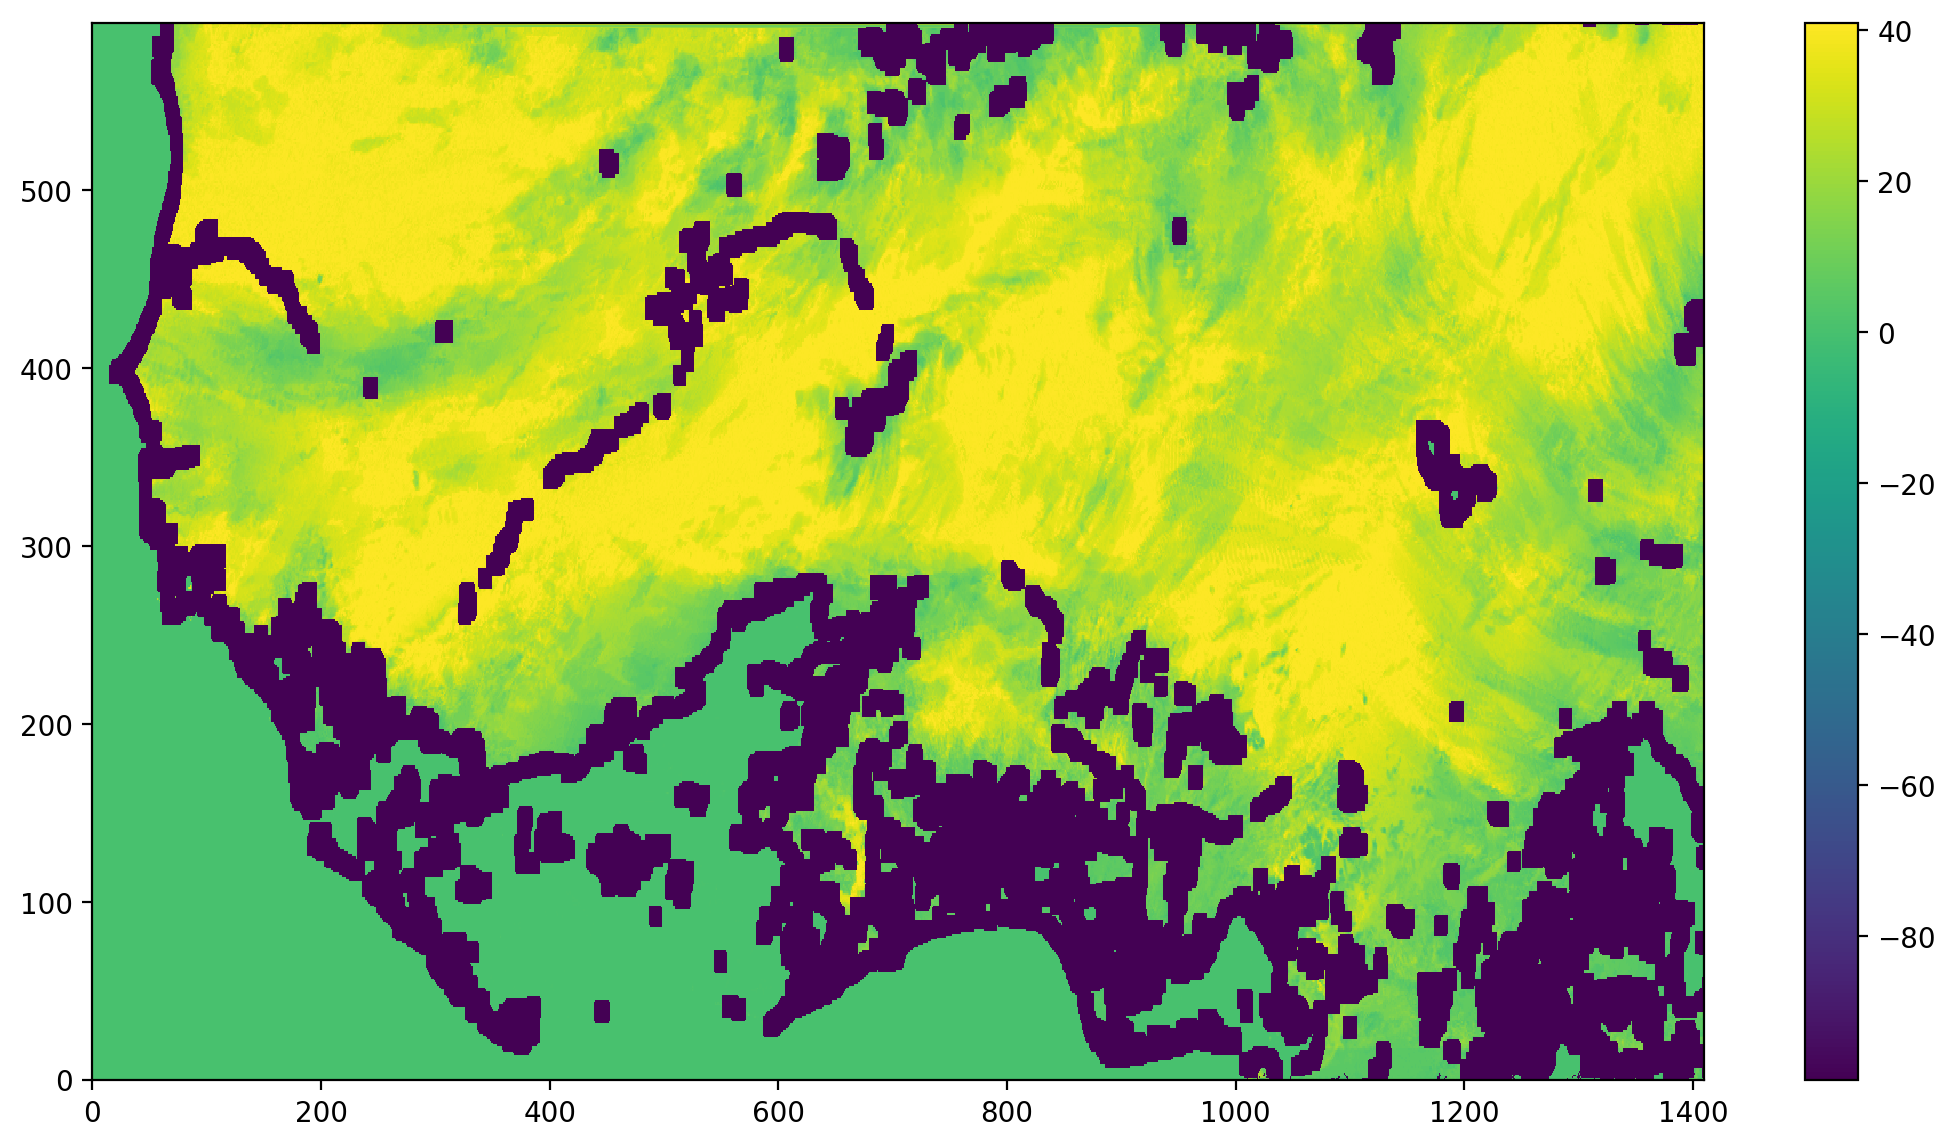

In [325]:
f = plt.figure(figsize=(13,7), dpi=200)
plt.pcolormesh(ds['NbSlot'])
plt.colorbar()

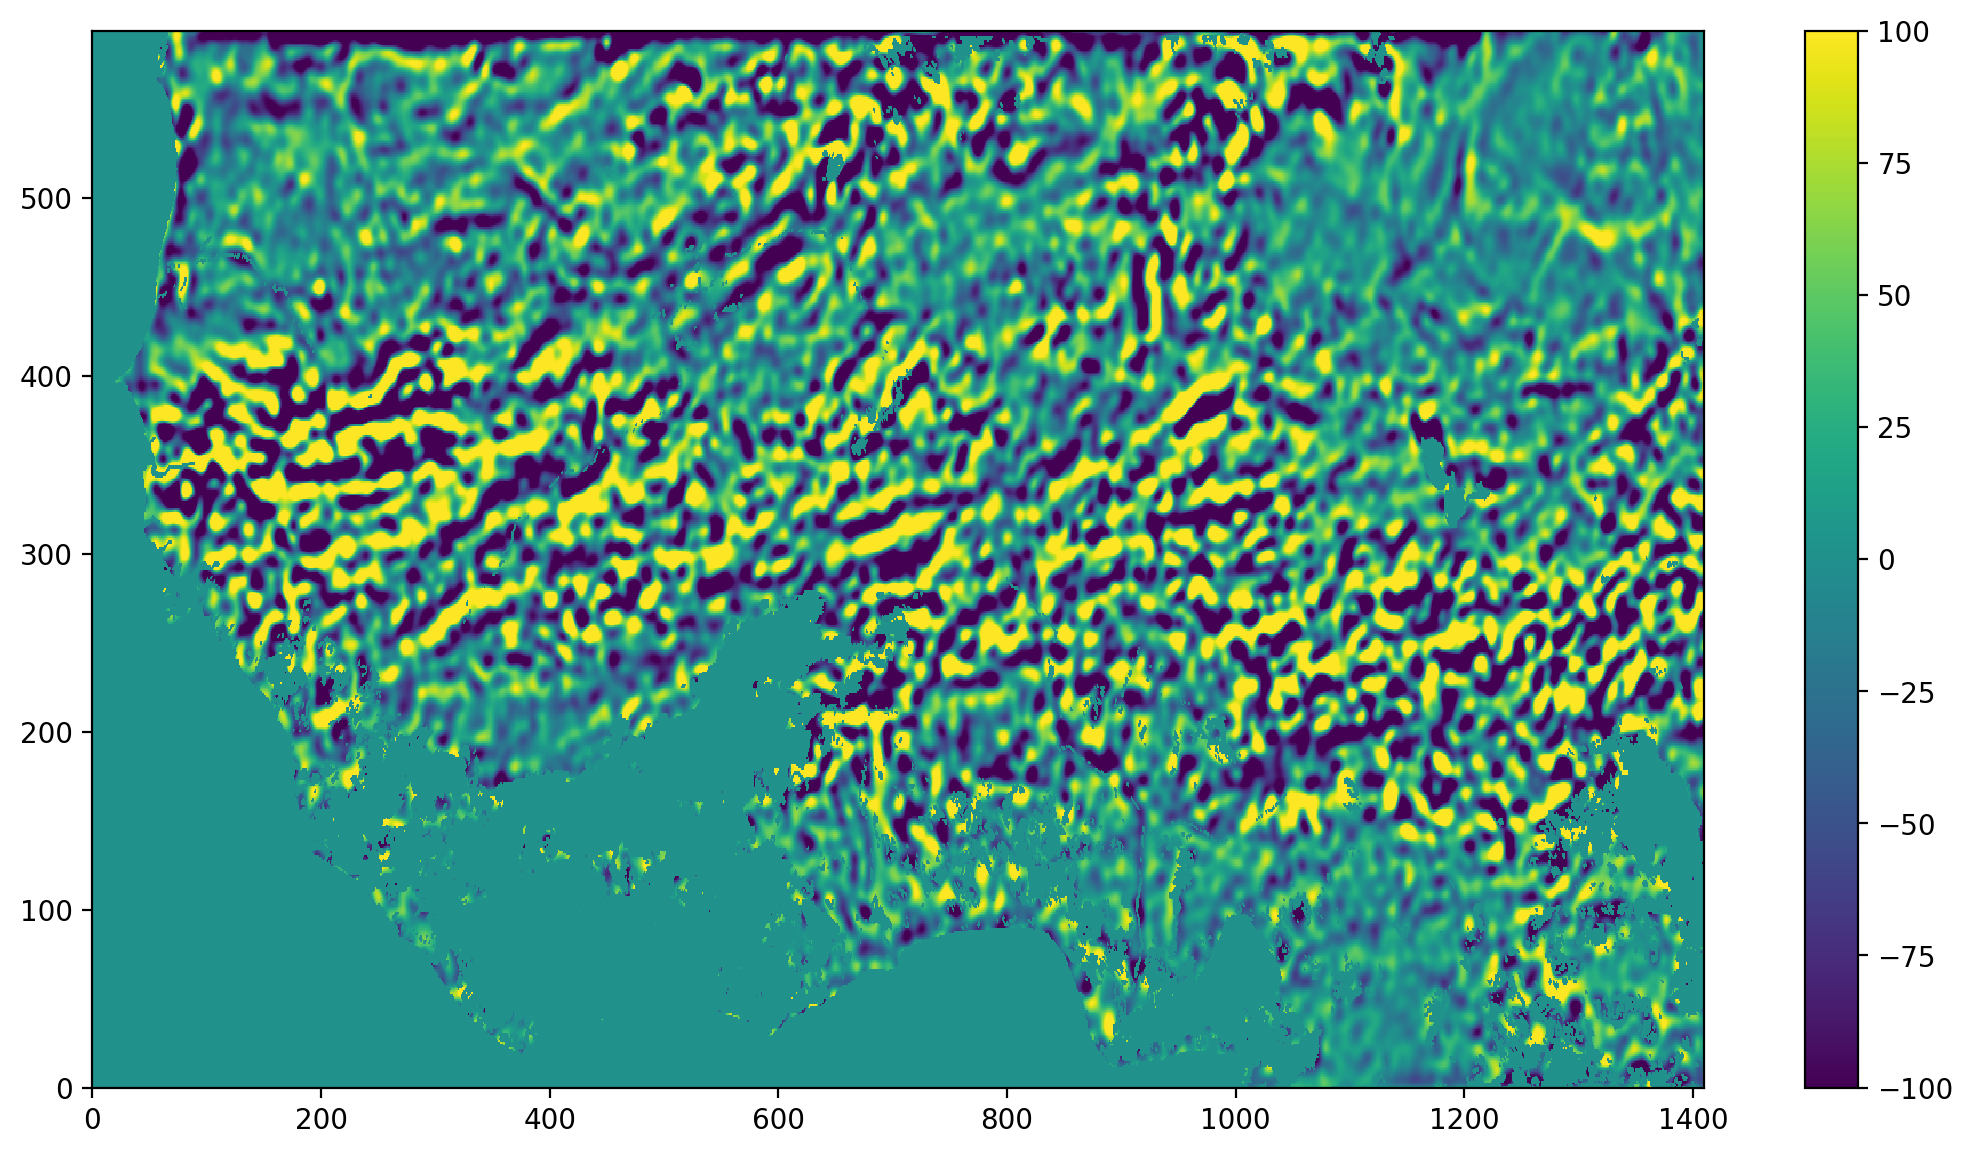

In [326]:
f = plt.figure(figsize=(13,7), dpi=200)
plt.pcolormesh(ds['wavelet'].isel(scales=2), vmin=-100, vmax=100)
plt.colorbar()

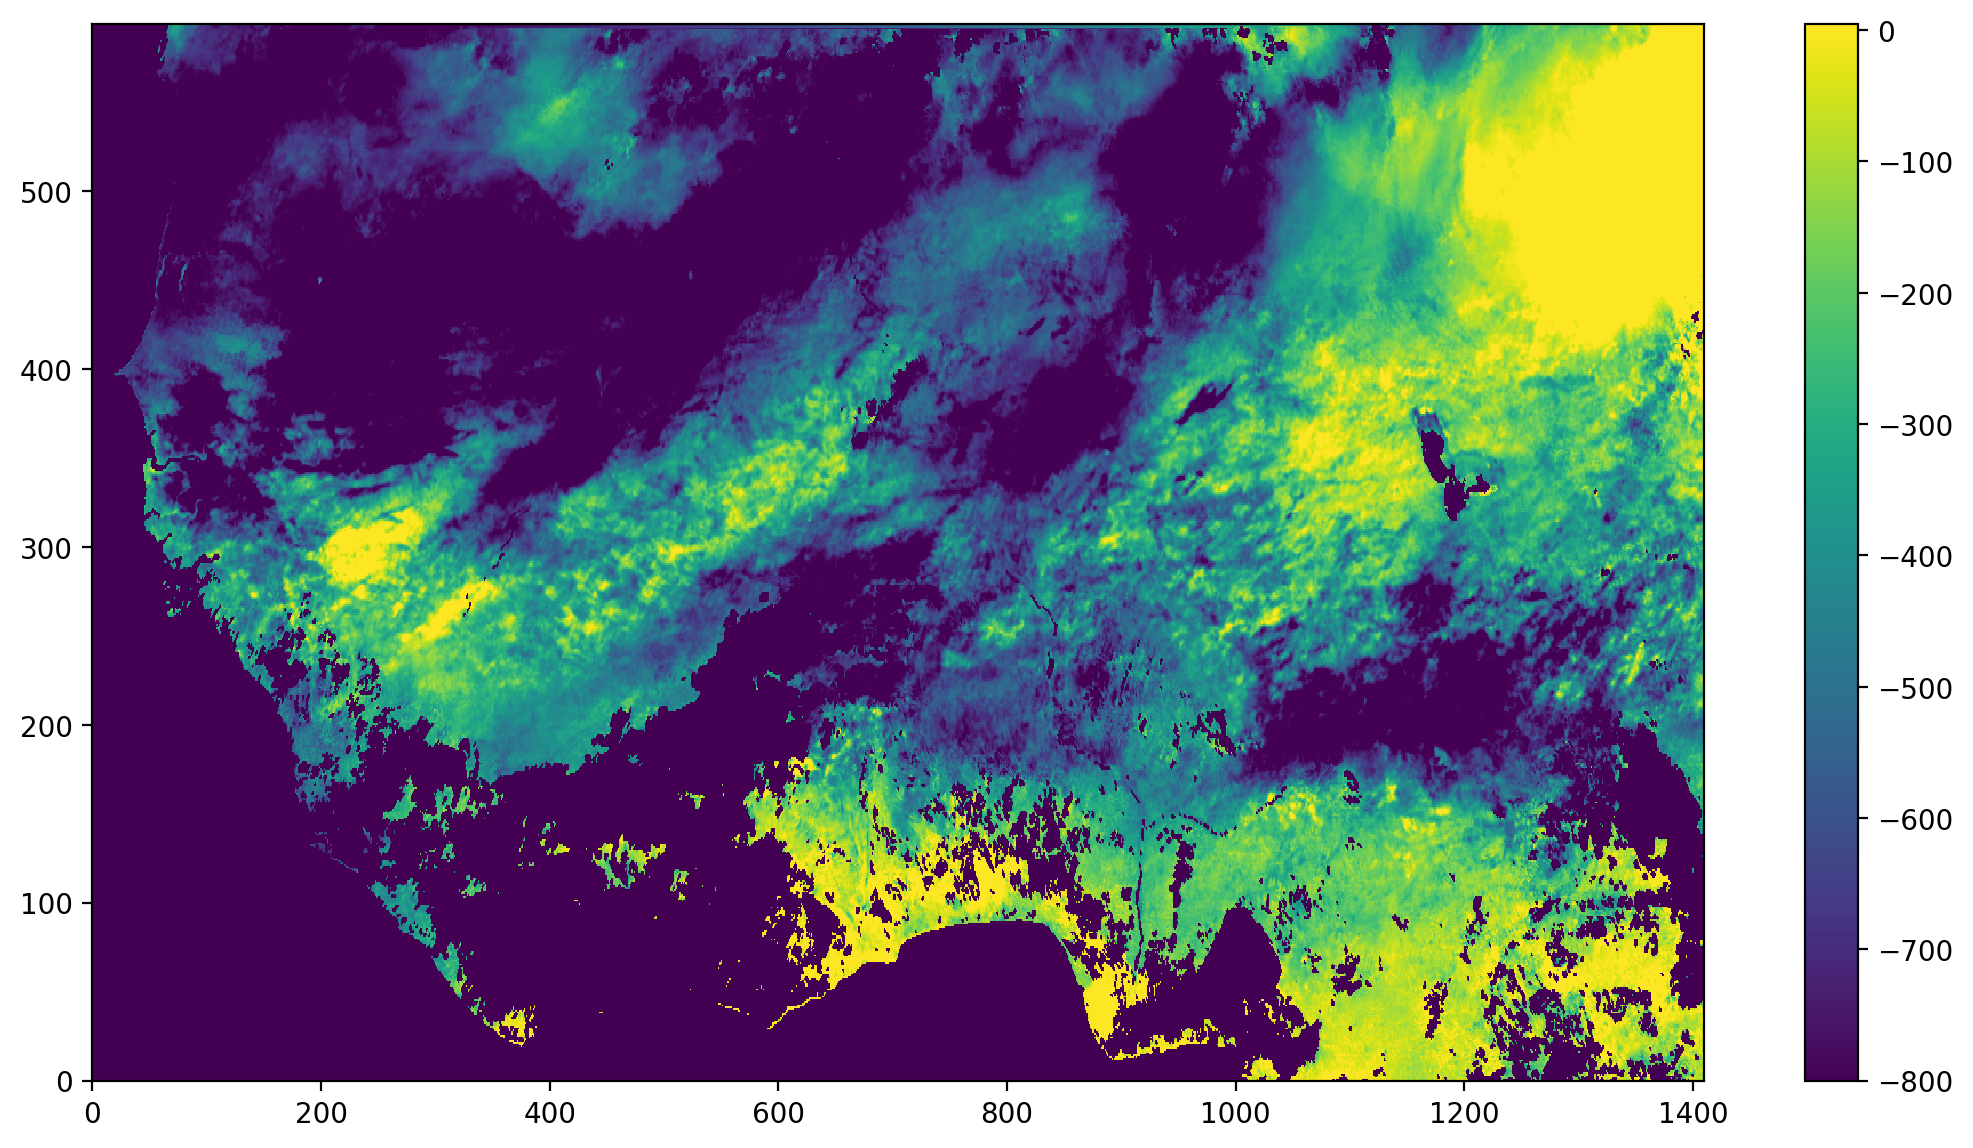

In [320]:
f = plt.figure(figsize=(13,7), dpi=200)
plt.pcolormesh(ds['lsta'], vmin=-800, vmax=5)
plt.colorbar()

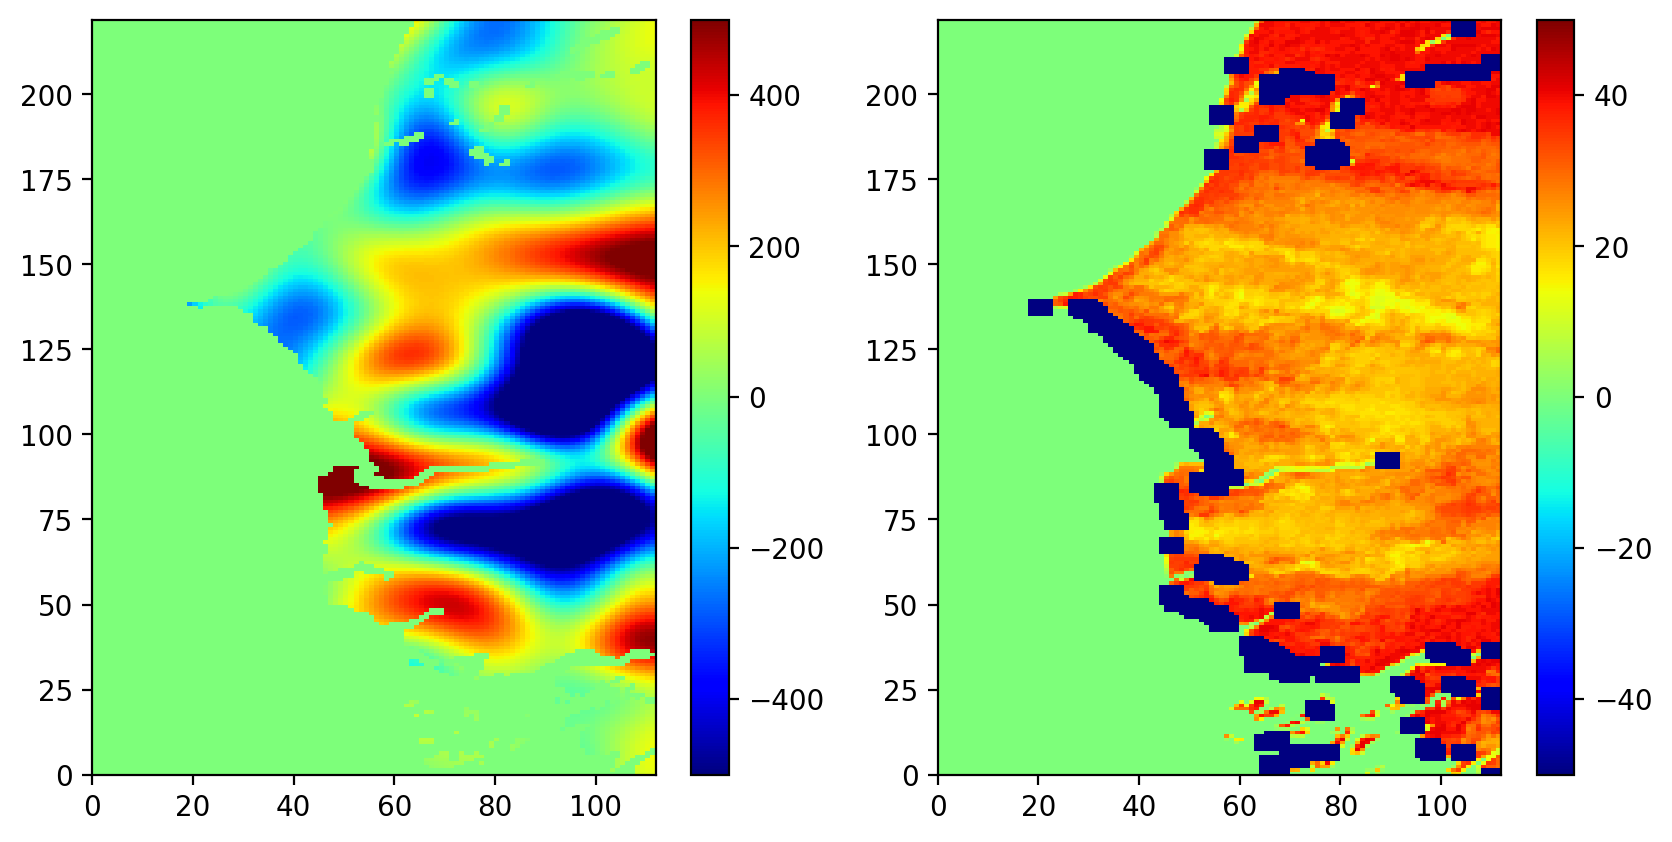

In [308]:
f = plt.figure(figsize=(10,5), dpi=200)
ax = f.add_subplot(121)
mp = ax.pcolormesh(ds['wavelet'].isel(scales=5).sel(lon=slice(-18,-15), lat=slice(11,17)),vmin=-500, vmax=500, cmap='jet')
plt.colorbar(mp)
ax = f.add_subplot(122)
mp = ax.pcolormesh(ds['NbSlot'].sel(lon=slice(-18,-15), lat=slice(11,17)),vmin=-50, vmax=50, cmap='jet')
plt.colorbar(mp)

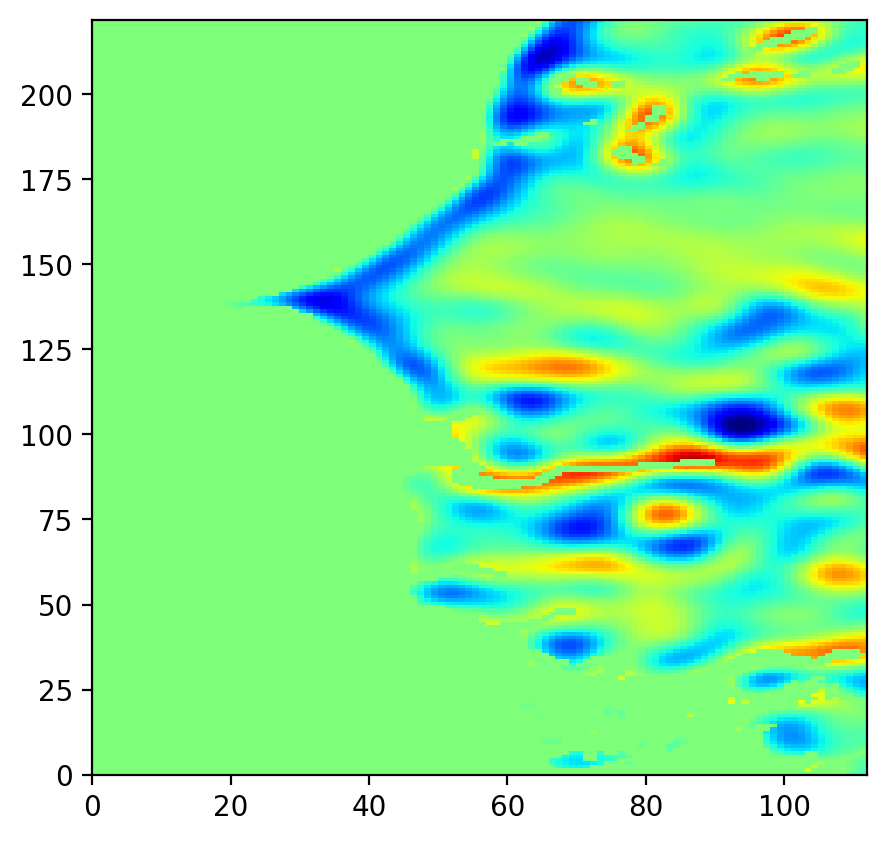

In [273]:
f = plt.figure(figsize=(5,5), dpi=200)

plt.pcolormesh(datwav['wavelet'].isel(scales=2).sel(lon=slice(-18,-15), lat=slice(11,17)),vmin=-500, vmax=500, cmap='jet')

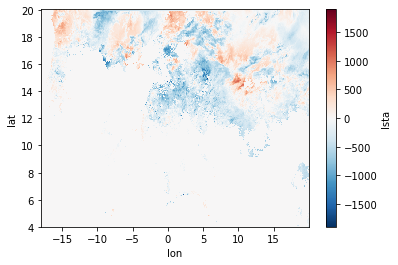

In [37]:
lsta['lsta'].plot()

In [ ]:
cmsg['lsta'].plot()

In [28]:
msg

<xarray.Dataset>
Dimensions:      (lat: 605, lon: 1744, time: 1487)
Coordinates:
  * lat          (lat) float64 4.0 4.027 4.054 4.081 ... 19.89 19.92 19.94 19.97
  * lon          (lon) float64 -18.0 -17.97 -17.95 -17.92 ... 28.92 28.95 28.97
  * time         (time) datetime64[ns] 2005-08-01 ... 2005-08-31T23:30:00
Data variables:
    small_scale  (time, lat, lon) int16 ...
    tir          (time, lat, lon) int16 ...
    dom          (time, lat, lon) int16 ...

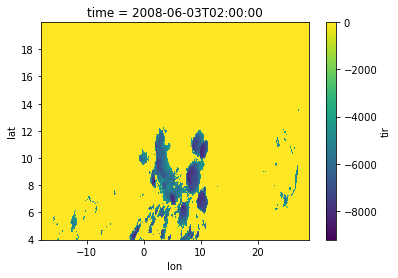

In [15]:
msg['tir'].isel(time=100).plot()

In [13]:
mdic

<xarray.Dataset>
Dimensions:  (x: 607, y: 387)
Coordinates:
    lon      (y, x) float32 -16.989176 -16.95986 ... -0.05794301 -0.02897151
    time     datetime64[ns] 2006-06-01
    lat      (y, x) float32 9.011302 9.011049 9.010735 ... 19.971786 19.971796
Dimensions without coordinates: x, y
Data variables:
    t        (y, x) int32 17 19 21 21 22 21 21 22 ... -8 -10 -12 -13 -15 -15 -14

In [18]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(15,10))
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree())
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.colorbar()
    plt.show()

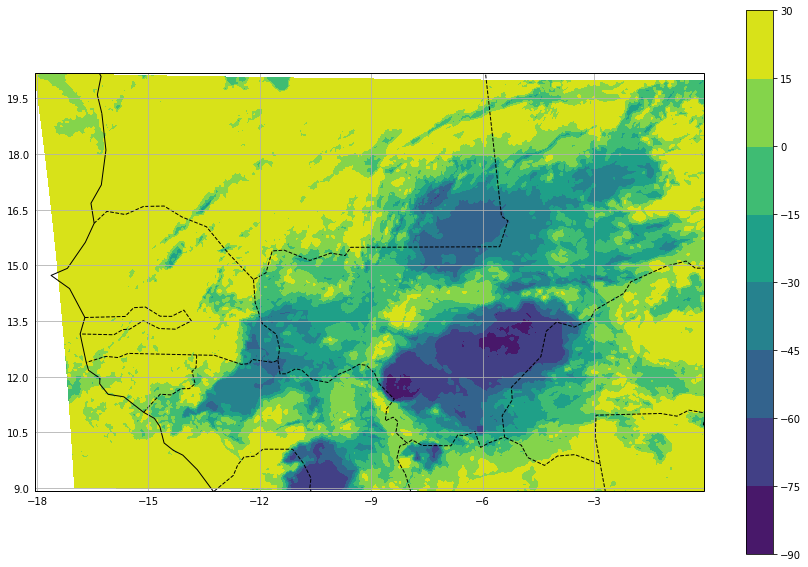

In [19]:
draw_map(mdic['t'], mdic['lat'], mdic['lon'])

In [21]:
# make salem grid
grid = u_grid.make(mdic['lon'].values, mdic['lat'].values, 5000)
inds, weights, shape = u_int.interpolation_weights_grid(mdic['lon'].values, mdic['lat'].values, grid)
gridd = (inds,weights,shape, grid)


In [22]:
outt = u_int.interpolate_data(mdic['t'].values, inds, weights, shape)

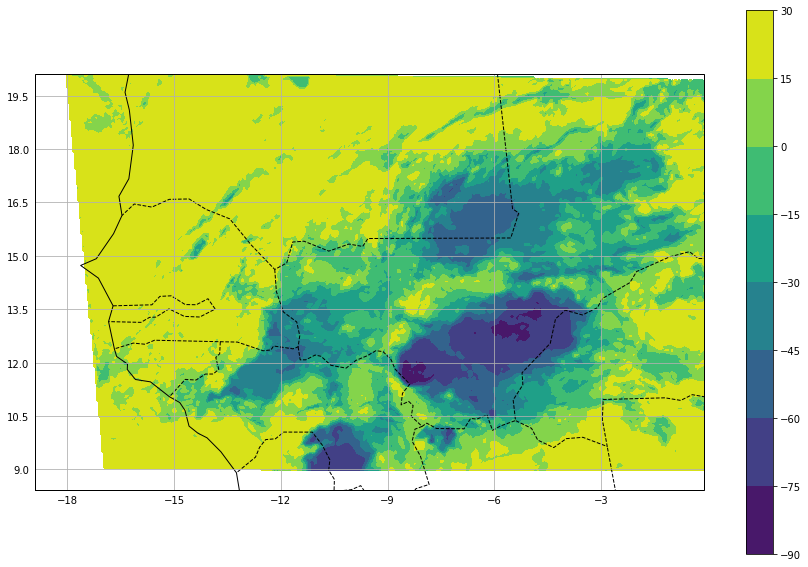

In [30]:
draw_map(outt, grid.ll_coordinates[1], grid.ll_coordinates[0])

In [27]:
grid.ll_coordinates

(array([[-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        ...,
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323]]),
 array([[ 8.93017387,  8.93017387,  8.93017387, ...,  8.93017387,
          8.93017387,  8.93017387],
        [ 8.97483424,  8.97483424,  8.97483424, ...,  8.97483424,
          8.97483424,  8.97483424],
        [ 9.01948904,  9.01948904,  9.01948904, ...,  9.01948904,
          9.01948904,  9.01948904],
        ...,
        [20.026321